# Análisis de Datos - Semana 7
## María José Foeca Vázquez

In [109]:
import cosmolopy.distance as distance
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("jla_lcparams.txt", sep = ' ')
data = data[['zcmb', 'mb', 'x1', 'color']]

#np.loadtxt(skiprows = 0, usecols = [1, 4, 6, 7], unpack = True)
def Mu(alpha, beta, Mb):
    return data.mb - (Mb - alpha* data.x1 + beta*data.color)

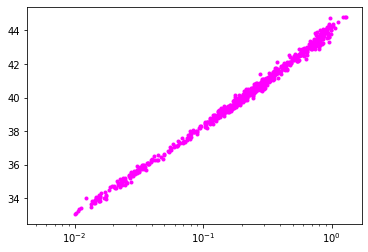

In [35]:
plt.scatter(data.zcmb, Mu(0.141, 3.101, -19.05), marker = '.', color = 'magenta')
plt.xscale('log')

In [29]:
cosmo = {'omega_M_0':0.22, 'omega_lambda_0':0.78, 'omega_k_0':0.0, 'h':0.7} #Los primeros 3 deben sumar 1
comovd = distance.comoving_distance(6, **cosmo)

In [15]:
comovd

array(8017.83891635)

In [9]:
distance.luminosity_distance?

Signature: distance.luminosity_distance(z, **cosmo)
Docstring:
The luminosity distance to redshift z.

Units are Mpc.

See, for example, David Hogg's arXiv:astro-ph/9905116v4
File:      ~/miniconda3/envs/ENV1/lib/python3.7/site-packages/cosmolopy/distance.py
Type:      function


In [10]:
lumdist = distance.luminosity_distance(6, **cosmo)

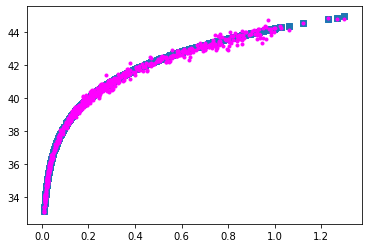

In [30]:
plt.scatter(data.zcmb, 5*np.log10(distance.luminosity_distance(data.zcmb, **cosmo)*10**6/10), marker = ',')
plt.scatter(data.zcmb, Mu(0.141, 3.101, -19.05), marker = '.', color = 'magenta')

In [107]:
def mu_teo(om_M):
    cosmo = {'omega_M_0': om_M, 'omega_lambda_0': 1 - om_M, 'omega_k_0':0.0, 'h':0.7}
    comovd = distance.comoving_distance(6, **cosmo)
    mu_calc = 5*np.log10(distance.luminosity_distance(data.zcmb, **cosmo)*10**6/10)
    return mu_calc

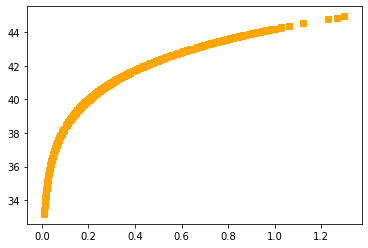

In [108]:
mu_teo(0.22)
plt.scatter(data.zcmb, mu_teo(0.22), marker = ',', color = 'orange')

In [48]:
data

,zcmb,mb,x1,color
0,0.503084,23.001698,1.273191,-0.012353
1,0.580724,23.573937,0.974346,-0.025076
2,0.494795,22.960139,-0.728837,-0.099683
3,0.345928,22.398137,-1.155110,-0.040581
4,0.677662,24.078115,0.618820,-0.039380
...,...,...,...,...
735,0.027064,16.504006,-0.137806,0.105288
736,0.025468,15.797848,-0.657941,-0.060805
737,0.023810,15.895501,0.618766,-0.055411
738,0.023867,16.068268,0.760605,0.052186


Matrices de covarianza:

In [53]:
cov1 = np.loadtxt('jla_v0_covmatrix.dat')
cov2 = np.loadtxt('jla_v0a_covmatrix.dat')
cov3 = np.loadtxt('jla_v0b_covmatrix.dat')
cov4 = np.loadtxt('jla_va_covmatrix.dat')
cov5 = np.loadtxt('jla_vab_covmatrix.dat')
cov6 = np.loadtxt('jla_vb_covmatrix.dat')

In [58]:
cov1 = np.reshape(cov1, (740, 740))
cov2 = np.reshape(cov2, (740, 740))
cov3 = np.reshape(cov3, (740, 740))
cov4 = np.reshape(cov4, (740, 740))
cov5 = np.reshape(cov5, (740, 740))
cov6 = np.reshape(cov6, (740, 740))

In [70]:
cov = cov1 + cov2 + cov3 + cov4+ cov5 + cov6
err_ = []
for i in range(740):
    err_.append(cov[i][i])

Text(0, 0.5, '$\\mu$')

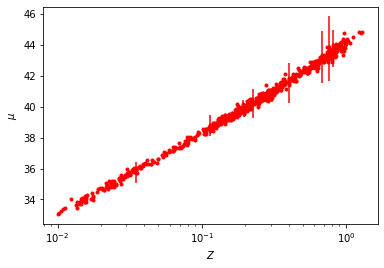

In [78]:
plt.errorbar(data.zcmb, Mu(0.141, 3.101, -19.05), yerr = err_, marker = '.', color = 'red', linestyle = 'None')
plt.xscale('log')
plt.xlabel('$Z$')
plt.ylabel('$\mu$')

Chi cuadrada:

In [135]:
#Método chi cuadrada:
def chisq(alpha_, beta_, Mb_, Omega_):
    teo = mu_teo(Omega_)
    obs = Mu(alpha_, beta_, Mb_) 